# Project Notebook


---
---
# Predicting Heart Disease
---
---

***
## Authorship and Resources Used
* Ali Khatai


***
## Data Description and Source
* This Datasets contains 11 features that can be used to predict the possibility of heart disease in a patient. The features include age, sex, chest pain type, cholesterol, Max heart rate etc.
* The dataset was found on Kaggle uploaded by user FEDESORIANO. This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

which can all be found under the Index of heart disease datasets from UCI Machine Learning Repository at this [link](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/). The creators of these datasets are:

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert    Detrano, M.D., Ph.D.

Citation: fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

***
## Research Question
* How well can we predict the possibility of Heart Disease in patients and which factors are the best predictors?

***
## Import Libraries and Set Preferences for Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, f1_score, log_loss
from sklearn.metrics import precision_score, recall_score, average_precision_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
# add any additional libraries or plot preferences to this block

***
## Read and Verify Data


In [ ]:
# enter and test your code here
# install Kaggle
! pip install -q kaggle

from google.colab import files
files.upload()

# make kaggle directory and move the file
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (3).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# API command for the dataset
! kaggle datasets download -d fedesoriano/heart-failure-prediction

# unzip the data
! mkdir kaggledata
! unzip heart-failure-prediction.zip -d kaggledata

heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘kaggledata’: File exists
Archive:  heart-failure-prediction.zip
replace kaggledata/heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: kaggledata/heart.csv    


In [ ]:
# Create the dataFrame from the CSV file
df = pd.read_csv('/content/kaggledata/heart.csv', encoding= 'unicode_escape')

In [ ]:
#examine the dataset
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
# check if data is balanced
print(df["HeartDisease"].value_counts())

1    508
0    410
Name: HeartDisease, dtype: int64


Our outcome column which is whether the patient has heart disease is fairly balanced with a 45-55% split.



***
## Inspect and clean data


In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# check for categorical and non-categorical data
# get the number of unique value in each column
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
# get list of categorical and non_categorical columns
noncat_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
cat_cols = ['HeartDisease','Sex','ChestPainType','FastingBS','RestingECG', 'ExerciseAngina','ST_Slope']

for i in cat_cols:
  print(df[i].value_counts())

1    508
0    410
Name: HeartDisease, dtype: int64
M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
0    704
1    214
Name: FastingBS, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


Encode categorical data

In [ ]:
# check the encoding
for i in cat_cols:
  print(df[i].value_counts())

1    508
0    410
Name: HeartDisease, dtype: int64
M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
0    704
1    214
Name: FastingBS, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


HeartDisease


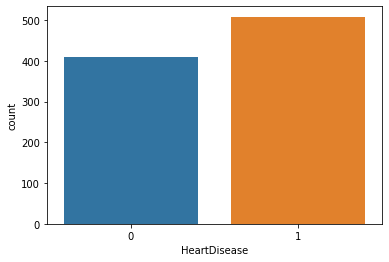


Sex


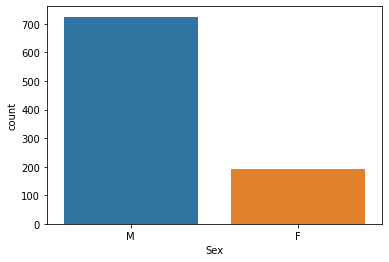


ChestPainType


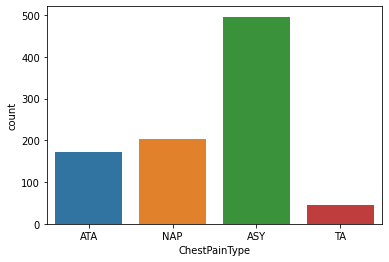


FastingBS


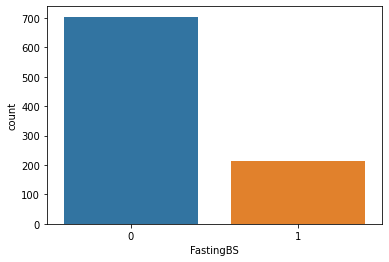


RestingECG


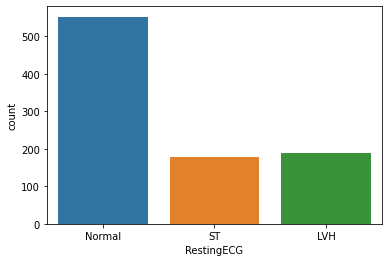


ExerciseAngina


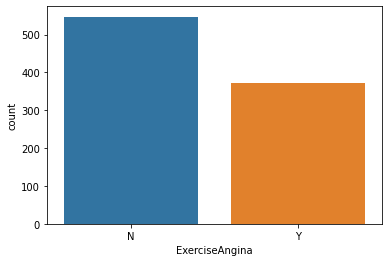


ST_Slope


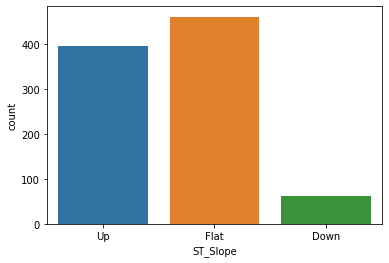

In [ ]:
for s in cat_cols:
  print(s)
  sns.countplot(x = df[s])
  plt.show()
  print()

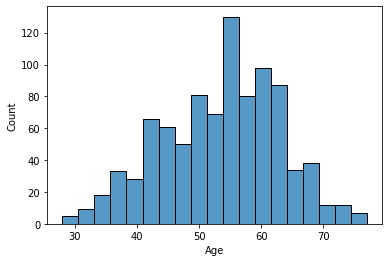

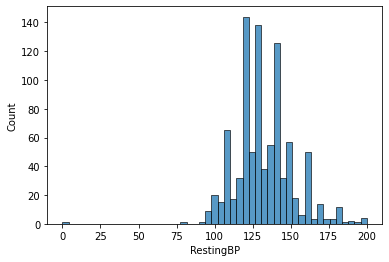

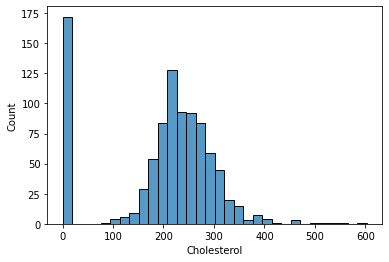

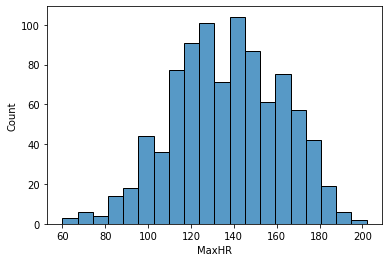

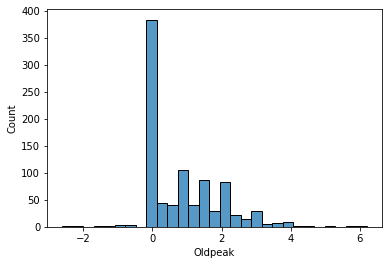

In [ ]:
# check distribution of numberical columns
df[noncat_cols].describe()

for s in noncat_cols:
  sns.histplot(x = df[s])
  plt.show()

Distribution of numerical columns seems to be fairly normal, so I will not be making any changes to that.

## Check assumption for logistic regression

In [ ]:
# Binary outcome
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

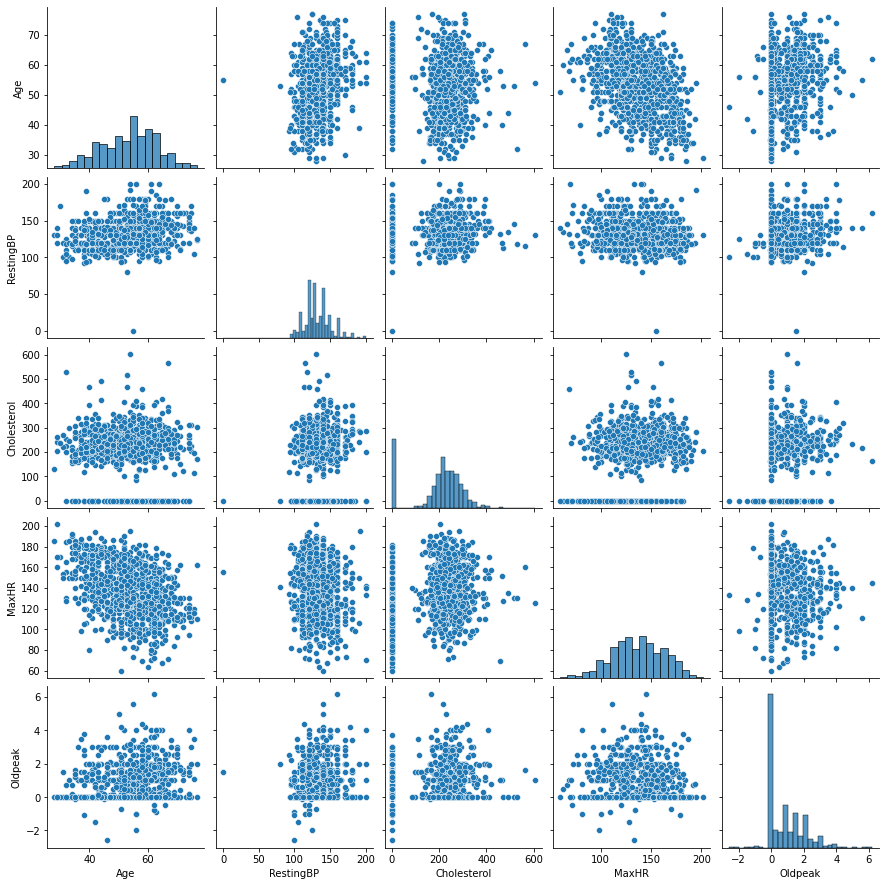

In [ ]:
# low levels of multi-collinearity
sns.pairplot(df[noncat_cols])
plt.show()

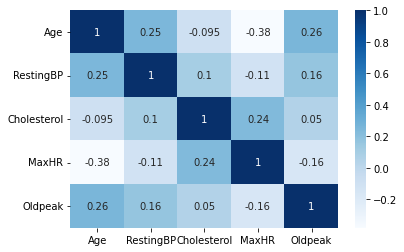

In [ ]:
sns.heatmap(df[noncat_cols].corr(), annot=True, cmap='Blues')
plt.show()

The heatmap and pairplot show low levels of correlation between all numerical features, so the assumption for low levels of multi-collinearity holds true

Helper function to compare model performance. Written by Prof. Brad Sheese

In [ ]:
# table to compare model performance
ct_cols = ['features','model',
           'aw_precision','aw_recall','aw_f1score',
           'actFpredF','actFpredM',
           'actMpredF','actMpredM',
           'notes']

comparison_table = pd.DataFrame(columns=ct_cols)

def add_results(ctable, feature_label, method_label, y, yhat, plabel, notes):
  '''
  takes: feature and model description, results table
  calculates: selected metrics
  returns: the results table updated with model and metrics
  '''
  # get average weighted metrics from classification report
  classreport = classification_report(y, yhat, output_dict=True)
  pscore = classreport['weighted avg']['precision']
  recall = classreport['weighted avg']['recall']
  f1score = classreport['weighted avg']['f1-score']

  # get classification counts from confusion matrix
  cm = confusion_matrix(y, yhat)
  actFpredF = cm[0][0]
  actFpredM = cm[0][1]
  actMpredF = cm[1][0]
  actMpredM = cm[1][1]

  results = [feature_label, method_label, pscore, recall, f1score,
             actFpredF, actFpredM, actMpredF, actMpredM, notes]
  ctable = ctable.append(pd.DataFrame([results], columns = ct_cols), ignore_index=True)
  return ctable

***
## Analyses and Visualizations



Full model using all features

In [ ]:
# define features and outcomes
X = df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','Sex','ChestPainType','FastingBS','RestingECG', 'ExerciseAngina','ST_Slope']]
y = df['HeartDisease']

# scale numeric features
numeric_features = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", StandardScaler())]
)

# encode categorical features
categorical_features = ['Sex','ChestPainType','FastingBS','RestingECG', 'ExerciseAngina','ST_Slope']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# transform the data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# define the model
model = LogisticRegression(solver='saga', max_iter=8000)

# define the pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', model)])

# Split into training and test sets
trainX, testX, trainY, testY = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                stratify = y)

# fit the data to the model
pipe.fit(trainX, trainY)

# get prediction for the training and test set
predictions_train = pipe.predict(trainX)
predictions = pipe.predict(testX)

# add model to comparison table
comparison_table = add_results(comparison_table,
            'Full Model - Linear',
            'Logistic Regression',
            testY, predictions,
            'F', 'solver: saga')

# generate reoprts for the models
print('Model Results: Classification of Train Set/n')
print(classification_report(trainY, predictions_train))

print('Model Results: Classification of Test Set/n')
print(classification_report(testY, predictions))

Model Results: Classification of Train Set/n
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       307
           1       0.88      0.90      0.89       381

    accuracy                           0.88       688
   macro avg       0.88      0.87      0.88       688
weighted avg       0.88      0.88      0.88       688

Model Results: Classification of Test Set/n
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       103
           1       0.86      0.89      0.88       127

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



In [ ]:
# check results using a confusion matrix
c_matrix = confusion_matrix(testY, predictions)
print('Our logistic regression model predicted the following when applied to the test data:')
print(f'It correctly predicted {c_matrix[0][0]} of {c_matrix[0][0] + c_matrix[0][1]} normal cases, but incorrectly predicted {c_matrix[0][1]} normal cases that did have heart disease.')
print(f'It correctly predicted {c_matrix[1][1]} of {c_matrix[1][0] + c_matrix[1][1]} heart disease cases, but incorrectly predicted {c_matrix[1][0]} heart disease cases that were normal.')

Our logistic regression model predicted the following when applied to the test data:
It correctly predicted 85 of 103 normal cases, but incorrectly predicted 18 normal cases that did have heart disease.
It correctly predicted 113 of 127 heart disease cases, but incorrectly predicted 14 heart disease cases that were normal.


In [ ]:
betas = pd.DataFrame(zip(trainX.columns, model.coef_[0]))
betas.columns = ['feature', 'beta']
betas.set_index('feature').sort_values(by='beta')

,beta
feature,
Sex,-0.729124
RestingECG,-0.450437
Cholesterol,-0.417258
ExerciseAngina,-0.393193
ST_Slope,-0.310977
MaxHR,-0.137536
RestingBP,0.064644
Age,0.274741
Oldpeak,0.594533


In [ ]:
betas['odds_ratio'] = betas['beta'].map(np.exp)
betas.sort_values('odds_ratio')

,feature,beta,odds_ratio
5,Sex,-0.729124,0.482331
8,RestingECG,-0.450437,0.637349
2,Cholesterol,-0.417258,0.658851
9,ExerciseAngina,-0.393193,0.674899
10,ST_Slope,-0.310977,0.732731
3,MaxHR,-0.137536,0.871503
1,RestingBP,0.064644,1.066779
0,Age,0.274741,1.316190
4,Oldpeak,0.594533,1.812184
6,ChestPainType,0.701925,2.017632


Reduced model, using the features that had the best beta values

In [ ]:
# define features and outcomes
X = df[['FastingBS','ChestPainType','Oldpeak','Age']]
y = df['HeartDisease']

# scale numeric features
numeric_features = ['Age','Oldpeak']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", StandardScaler())]
)

# encode categorical features
categorical_features = ['FastingBS','ChestPainType']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# transform the data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# define the model
model = LogisticRegression(solver='saga', max_iter=8000)

# define the pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', model)])

# Split into training and test sets
trainX, testX, trainY, testY = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                stratify = y)

# fit the data to the model
pipe.fit(trainX, trainY)

# get prediction for the training and test set
predictions_train = pipe.predict(trainX)
predictions = pipe.predict(testX)

# add model to comparison table
comparison_table = add_results(comparison_table,
            'Reduced Model - Linear',
            'Logistic Regression',
            testY, predictions,
            'F', 'solver: saga')

# generate reoprts for the models
print('Model Results: Classification of Train Set/n')
print(classification_report(trainY, predictions_train))

print('Model Results: Classification of Test Set/n')
print(classification_report(testY, predictions))


Model Results: Classification of Train Set/n
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       307
           1       0.77      0.83      0.80       381

    accuracy                           0.77       688
   macro avg       0.77      0.76      0.76       688
weighted avg       0.77      0.77      0.77       688

Model Results: Classification of Test Set/n
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       103
           1       0.77      0.85      0.81       127

    accuracy                           0.78       230
   macro avg       0.78      0.77      0.77       230
weighted avg       0.78      0.78      0.78       230



In [ ]:
# check results using a confusion matrix
c_matrix = confusion_matrix(testY, predictions)
print('Our logistic regression model predicted the following when applied to the test data:')
print(f'It correctly predicted {c_matrix[0][0]} of {c_matrix[0][0] + c_matrix[0][1]} normal cases, but incorrectly predicted {c_matrix[0][1]} normal cases that did have heart disease.')
print(f'It correctly predicted {c_matrix[1][1]} of {c_matrix[1][0] + c_matrix[1][1]} heart disease cases, but incorrectly predicted {c_matrix[1][0]} heart disease cases that were normal.')

Our logistic regression model predicted the following when applied to the test data:
It correctly predicted 71 of 103 normal cases, but incorrectly predicted 32 normal cases that did have heart disease.
It correctly predicted 108 of 127 heart disease cases, but incorrectly predicted 19 heart disease cases that were normal.


Reduced model. For this one, I went to google and searched what were the best predictors of heart disease. I found that blood pressure, cholesterol, diabetes and age are likely the best indicators of heart disease, so I will use these features in this reduced model

In [ ]:
# define features and outcomes
X = df[['Age','Cholesterol','RestingBP','FastingBS']]
y = df['HeartDisease']

# scale numeric features
numeric_features = ['Age','Cholesterol','RestingBP']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", StandardScaler())]
)

# encode categorical features
categorical_features = ['FastingBS']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# transform the data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# define the model
model = LogisticRegression(solver='saga', max_iter=8000)

# define the pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', model)])

# Split into training and test sets
trainX, testX, trainY, testY = train_test_split(X,
                                                y,
                                                test_size = 0.25,
                                                stratify = y)

# fit the data to the model
pipe.fit(trainX, trainY)

# get prediction for the training and test set
predictions_train = pipe.predict(trainX)
predictions = pipe.predict(testX)

# add model to comparison table
comparison_table = add_results(comparison_table,
            'Reduced Model2 - Linear',
            'Logistic Regression',
            testY, predictions,
            'F', 'solver: saga')

# generate reoprts for the models
print('Model Results: Classification of Train Set/n')
print(classification_report(trainY, predictions_train))

print('Model Results: Classification of Test Set/n')
print(classification_report(testY, predictions))


Model Results: Classification of Train Set/n
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       307
           1       0.70      0.72      0.71       381

    accuracy                           0.67       688
   macro avg       0.67      0.67      0.67       688
weighted avg       0.67      0.67      0.67       688

Model Results: Classification of Test Set/n
              precision    recall  f1-score   support

           0       0.66      0.54      0.60       103
           1       0.68      0.77      0.72       127

    accuracy                           0.67       230
   macro avg       0.67      0.66      0.66       230
weighted avg       0.67      0.67      0.66       230



In [ ]:
# check results using a confusion matrix
c_matrix = confusion_matrix(testY, predictions)
print('Our logistic regression model predicted the following when applied to the test data:')
print(f'It correctly predicted {c_matrix[0][0]} of {c_matrix[0][0] + c_matrix[0][1]} normal cases, but incorrectly predicted {c_matrix[0][1]} normal cases that did have heart disease.')
print(f'It correctly predicted {c_matrix[1][1]} of {c_matrix[1][0] + c_matrix[1][1]} heart disease cases, but incorrectly predicted {c_matrix[1][0]} heart disease cases that were normal.')

Our logistic regression model predicted the following when applied to the test data:
It correctly predicted 56 of 103 normal cases, but incorrectly predicted 47 normal cases that did have heart disease.
It correctly predicted 98 of 127 heart disease cases, but incorrectly predicted 29 heart disease cases that were normal.


In [ ]:
comparison_table

,features,model,aw_precision,aw_recall,aw_f1score,actFpredF,actFpredM,actMpredF,actMpredM,notes
0,Full Model - Linear,Logistic Regression,0.860800,0.860870,0.860571,85,18,14,113,solver: saga
1,Reduced Model - Linear,Logistic Regression,0.779248,0.778261,0.776191,71,32,19,108,solver: saga
2,Reduced Model2 - Linear,Logistic Regression,0.668232,0.669565,0.664680,56,47,29,98,solver: saga


***
## Conclusions
* The full model correctly predicts if a patient has heart disease about 88% of the time which is very good, but if makes some false predictions as well

* The reduced model with 4 features has a much lower f1 score than the full model,correctly predicting heart disease about 84% of the time but making far more false predictions as well

* The best predictors for Heart Disease based on the beta value were Blood sugar levels and type of chest pain

* Overall, these model have good accuracy, but shouldn’t be used to diagnose Heart Disease. However, they are a good tool to check the possibility of heart Disease in a patient.


---
---